In [150]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
import lightgbm as lgb

import warnings
warnings.filterwarnings('ignore')

### 1. Read & clean

In [151]:
df = pd.read_excel("data_motobikes.xlsx")

In [152]:
df.head()

,id,Tiêu đề,Giá,Khoảng giá min,Khoảng giá max,Địa chỉ,Mô tả chi tiết,Thương hiệu,Dòng xe,Năm đăng ký,Số Km đã đi,Tình trạng,Loại xe,Dung tích xe,Xuất xứ,Chính sách bảo hành,Trọng lượng,Href
0,1,"Bán Vespa Sprint 125cc 2024 xanh dương, xe đẹp...",66.000.000 đ,72.53 tr,85.14 tr,"Phường Bến Thành, Quận 1, Tp Hồ Chí Minh",Bán xe #Vespa Sprint 125cc. Mua mới tại #Topco...,Piaggio,Vespa,2024,14000,Đã sử dụng,Tay ga,100 - 175 cc,Đang cập nhật,Bảo hành hãng,> 50 kg,https://xe.chotot.com/mua-ban-xe-may-quan-1-tp...
1,2,🔥🔥SH 150i Thắng ABS 2019 BSTP Chính Chủ,79.500.000 đ,62.76 tr,73.68 tr,"Phường Tân Định, Quận 1, Tp Hồ Chí Minh","_Bán SH 150i Thắng ABS 2019 Xám Bạc, Úp Team X...",Honda,SH,2019,28000,Đã sử dụng,Tay ga,100 - 175 cc,Đang cập nhật,Bảo hành hãng,> 50 kg,https://xe.chotot.com/mua-ban-xe-may-quan-1-tp...
2,3,CC Vision Thể Thao 2023 Đen+bộ đèn Demi audi A7,37.000.000 đ,28 tr,32.86 tr,"Phường Cầu Kho, Quận 1, Tp Hồ Chí Minh",Chính chủ bán Vision phiên bản Thể Thao 2023 Đ...,Honda,Vision,2023,12000,Đã sử dụng,Tay ga,100 - 175 cc,Đang cập nhật,Bảo hành hãng,> 50 kg,https://xe.chotot.com/mua-ban-xe-may-quan-1-tp...
3,4,Vespa Sprint 2019 -125- Đen Đỏ Sport -CHÍNH ...,45.000.000 đ,43.1 tr,50.6 tr,"Phường Bến Nghé, Quận 1, Tp Hồ Chí Minh",XE CÁ NHÂN BÁN - XE DO EM ĐỨNG TÊN CHÍNH C...,Piaggio,Vespa,2019,60000,Đã sử dụng,Tay ga,100 - 175 cc,Đang cập nhật,Bảo hành hãng,> 50 kg,https://xe.chotot.com/mua-ban-xe-may-quan-1-tp...
4,5,Xe tay ga Yamaha Latte 125 – Đăng ký 2021,23.000.000 đ,17.02 tr,19.98 tr,"Phường Tân Định, Quận 1, Tp Hồ Chí Minh",🛵 Thông tin xe:\n\nDòng xe tay ga cao cấp Yama...,Yamaha,Latte,2021,24000,Đã sử dụng,Tay ga,100 - 175 cc,Nhật Bản,Bảo hành hãng,> 50 kg,https://xe.chotot.com/mua-ban-xe-may-quan-1-tp...


In [153]:
df.tail()

,id,Tiêu đề,Giá,Khoảng giá min,Khoảng giá max,Địa chỉ,Mô tả chi tiết,Thương hiệu,Dòng xe,Năm đăng ký,Số Km đã đi,Tình trạng,Loại xe,Dung tích xe,Xuất xứ,Chính sách bảo hành,Trọng lượng,Href
7203,7204,Bán xe vario,39.000.000 đ,36.19 tr,42.49 tr,"Xã Phước Kiển, Huyện Nhà Bè, Tp Hồ Chí Minh",Xe mua chính chủ 2024 mới chạy 1000km xe bao z...,Honda,Vario,2024,1000,Đã sử dụng,Tay ga,100 - 175 cc,Nước khác,Bảo hành hãng,> 50 kg,https://xe.chotot.com/mua-ban-xe-may-huyen-nha...
7204,7205,Xe Lead 110 tất cả zin hết !,10.000.000 đ,7.25 tr,8.51 tr,"Xã Phú Xuân, Huyện Nhà Bè, Tp Hồ Chí Minh",Trước e mua xe lead này hơn 12tr của 1 giáo ch...,Honda,Lead,2011,76000,Đã sử dụng,Tay ga,100 - 175 cc,Nhật Bản,Bảo hành hãng,> 50 kg,https://xe.chotot.com/mua-ban-xe-may-huyen-nha...
7205,7206,Bán xe Yamaha Janus 2017 FI smart key màu xanh,13.500.000 đ,12.97 tr,15.23 tr,"Thị trấn Nhà Bè, Huyện Nhà Bè, Tp Hồ Chí Minh","Bán xe Yamaha Janus 2017 FI smart key, màu xan...",Yamaha,Janus,2017,49000,Đã sử dụng,Tay ga,100 - 175 cc,Việt Nam,Bảo hành hãng,> 50 kg,https://xe.chotot.com/mua-ban-xe-may-huyen-nha...
7206,7207,Bán xe Future Đời đầu Chính Chủ,10.500.000 đ,14.16 tr,16.63 tr,"Xã Phước Kiển, Huyện Nhà Bè, Tp Hồ Chí Minh",Xe cũ theo năm tháng những vẫn còn đẹp và liền...,Honda,Future,2000,80000,Đã sử dụng,Xe số,100 - 175 cc,Việt Nam,Bảo hành hãng,> 50 kg,https://xe.chotot.com/mua-ban-xe-may-huyen-nha...
7207,7208,Bán Ducati Scrambler 2020 chính chủ cavet BSSG,225.000.000 đ,NaN,NaN,"Xã Phước Kiển, Huyện Nhà Bè, Tp Hồ Chí Minh",Đổi xe nên bán Ducati scrambler sản xuất 2019 ...,Ducati,Scrambler,2020,30000,Đã sử dụng,Tay côn/Moto,Trên 175 cc,Đang cập nhật,Bảo hành hãng,> 50 kg,https://xe.chotot.com/mua-ban-xe-may-huyen-nha...


In [154]:
df.describe(include='all')

,id,Tiêu đề,Giá,Khoảng giá min,Khoảng giá max,Địa chỉ,Mô tả chi tiết,Thương hiệu,Dòng xe,Năm đăng ký,Số Km đã đi,Tình trạng,Loại xe,Dung tích xe,Xuất xứ,Chính sách bảo hành,Trọng lượng,Href
count,7208.000000,7207,7206,7006,7011,7167,7208,7205,7205,7208,7208.000000,7208,7208,7208,7208,7207,7207,7208
unique,NaN,6839,741,1304,1348,310,7183,37,195,79,NaN,2,3,7,12,1,1,7196
top,NaN,Bán xe,25.000.000 đ,23.44 tr,7.94 tr,"Phường Bình Hưng Hoà A, Quận Bình Tân, Tp Hồ C...",Mình cần bán xe như hình \nXe giấy tờ đầy đủ n...,Honda,Wave,2019,NaN,Đã sử dụng,Tay ga,100 - 175 cc,Việt Nam,Bảo hành hãng,> 50 kg,https://xe.chotot.com/mua-ban-xe-may-huyen-nha...
freq,NaN,29,138,43,54,113,10,4374,727,482,NaN,7207,3600,5857,2875,7207,7207,3
mean,3604.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64378.889012,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,2080.914703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,136573.455355,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,1802.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,3604.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,5406.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53327.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7208 entries, 0 to 7207
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   7208 non-null   int64 
 1   Tiêu đề              7207 non-null   object
 2   Giá                  7206 non-null   object
 3   Khoảng giá min       7006 non-null   object
 4   Khoảng giá max       7011 non-null   object
 5   Địa chỉ              7167 non-null   object
 6   Mô tả chi tiết       7208 non-null   object
 7   Thương hiệu          7205 non-null   object
 8   Dòng xe              7205 non-null   object
 9   Năm đăng ký          7208 non-null   object
 10  Số Km đã đi          7208 non-null   int64 
 11  Tình trạng           7208 non-null   object
 12  Loại xe              7208 non-null   object
 13  Dung tích xe         7208 non-null   object
 14  Xuất xứ              7208 non-null   object
 15  Chính sách bảo hành  7207 non-null   object
 16  Trọng 

In [156]:
df.columns

Index(['id', 'Tiêu đề', 'Giá', 'Khoảng giá min', 'Khoảng giá max', 'Địa chỉ',
       'Mô tả chi tiết', 'Thương hiệu', 'Dòng xe', 'Năm đăng ký',
       'Số Km đã đi', 'Tình trạng', 'Loại xe', 'Dung tích xe', 'Xuất xứ',
       'Chính sách bảo hành', 'Trọng lượng', 'Href'],
      dtype='object')

In [157]:
df.shape

(7208, 18)

In [158]:
cols_to_drop = ['id', 'Tiêu đề', 'Địa chỉ', 'Mô tả chi tiết', 'Href']
# Drop the unnecessary columns
df_prep = df.drop(cols_to_drop, axis=1)
df_prep.columns

Index(['Giá', 'Khoảng giá min', 'Khoảng giá max', 'Thương hiệu', 'Dòng xe',
       'Năm đăng ký', 'Số Km đã đi', 'Tình trạng', 'Loại xe', 'Dung tích xe',
       'Xuất xứ', 'Chính sách bảo hành', 'Trọng lượng'],
      dtype='object')

In [159]:
# Rename columns to simplify
df_prep = df_prep.rename(columns={
    'Giá': 'price',
    'Khoảng giá min': 'min_price',
    'Khoảng giá max': 'max_price',
    'Thương hiệu': 'brand',
    'Dòng xe': 'model',
    'Năm đăng ký': 'registration_year',
    'Số Km đã đi': 'mileage_km',
    'Tình trạng': 'condition',
    'Loại xe': 'bike_type',
    'Dung tích xe': 'engine_capacity',
    'Xuất xứ': 'origin',
    'Chính sách bảo hành': 'warranty_policy',
    'Trọng lượng': 'weight'
})
df_prep.columns

Index(['price', 'min_price', 'max_price', 'brand', 'model',
       'registration_year', 'mileage_km', 'condition', 'bike_type',
       'engine_capacity', 'origin', 'warranty_policy', 'weight'],
      dtype='object')

In [160]:
# Check for numbers of unique values for each column
for col in df_prep.columns:
    print(f'{col}: {df_prep[col].nunique()}')
    if df_prep[col].nunique() < 38: # check for nulls in 'brand'
        print(df_prep[col].unique())

price: 741
min_price: 1304
max_price: 1348
brand: 37
['Piaggio' 'Honda' 'Yamaha' 'SYM' 'Kawasaki' 'Hãng khác' 'KTM' 'Suzuki'
 'Peugeot' 'Royal Enfield' 'Triumph' 'Victory' 'Kymco' 'Taya' 'Ducati' nan
 'Benelli' 'Hyosung' 'VinFast' 'Detech' 'Harley Davidson' 'Brixton' 'BMW'
 'Keeway' 'GPX' 'RebelUSA' 'Halim' 'Sanda' 'Nioshima' 'Daelim' 'Sachs'
 'Aprilia' 'Bazan' 'CR&S' 'Moto Guzzi' 'Vento' 'Kengo' 'Visitor']
model: 195
registration_year: 79
mileage_km: 1323
condition: 2
['Đã sử dụng' 'Mới']
bike_type: 3
['Tay ga' 'Xe số' 'Tay côn/Moto']
engine_capacity: 7
['100 - 175 cc' 'Dưới 50 cc' '50 - 100 cc' 'Trên 175 cc' 'Không biết rõ'
 'Đang cập nhật' 'Nhật Bản']
origin: 12
['Đang cập nhật' 'Nhật Bản' 'Việt Nam' 'Nước khác' 'Đài Loan' 'Thái Lan'
 'Trung Quốc' 'Mỹ' 'Hàn Quốc' 'Ấn Độ' 'Đức' 'Bảo hành hãng']
warranty_policy: 1
['Bảo hành hãng' nan]
weight: 1
['> 50 kg' nan]


In [161]:
df_prep.isnull().sum()

price                  2
min_price            202
max_price            197
brand                  3
model                  3
registration_year      0
mileage_km             0
condition              0
bike_type              0
engine_capacity        0
origin                 0
warranty_policy        1
weight                 1
dtype: int64

In [162]:
df_prep = df_prep.dropna().reset_index(drop=True)

In [163]:
df_prep = df_prep.drop(columns=['warranty_policy', 'weight']).reset_index(drop=True)


In [164]:
df_prep.tail()

,price,min_price,max_price,brand,model,registration_year,mileage_km,condition,bike_type,engine_capacity,origin
7000,45.000.000 đ,38.21 tr,44.86 tr,Piaggio,Vespa,2018,8000,Đã sử dụng,Tay ga,100 - 175 cc,Việt Nam
7001,39.000.000 đ,36.19 tr,42.49 tr,Honda,Vario,2024,1000,Đã sử dụng,Tay ga,100 - 175 cc,Nước khác
7002,10.000.000 đ,7.25 tr,8.51 tr,Honda,Lead,2011,76000,Đã sử dụng,Tay ga,100 - 175 cc,Nhật Bản
7003,13.500.000 đ,12.97 tr,15.23 tr,Yamaha,Janus,2017,49000,Đã sử dụng,Tay ga,100 - 175 cc,Việt Nam
7004,10.500.000 đ,14.16 tr,16.63 tr,Honda,Future,2000,80000,Đã sử dụng,Xe số,100 - 175 cc,Việt Nam


In [165]:
df = df_prep.copy()
df['price'] = (
    df['price']
    .astype(str)
    .str.replace('[^0-9]', '', regex=True)   # chỉ giữ lại chữ số
    .replace('', np.nan)
    .astype(float)
)

In [166]:
def parse_minmax_price(s):
    if pd.isna(s):
        return np.nan
    s = str(s).lower().replace("tr", "").replace(" ", "")
    try:
        return float(s) * 1_000_000
    except:
        return np.nan

df['min_price'] = df['min_price'].apply(parse_minmax_price)
df['max_price'] = df['max_price'].apply(parse_minmax_price)

In [167]:
df.head()

,price,min_price,max_price,brand,model,registration_year,mileage_km,condition,bike_type,engine_capacity,origin
0,66000000.0,72530000.0,85140000.0,Piaggio,Vespa,2024,14000,Đã sử dụng,Tay ga,100 - 175 cc,Đang cập nhật
1,79500000.0,62760000.0,73680000.0,Honda,SH,2019,28000,Đã sử dụng,Tay ga,100 - 175 cc,Đang cập nhật
2,37000000.0,28000000.0,32860000.0,Honda,Vision,2023,12000,Đã sử dụng,Tay ga,100 - 175 cc,Đang cập nhật
3,45000000.0,43100000.0,50600000.0,Piaggio,Vespa,2019,60000,Đã sử dụng,Tay ga,100 - 175 cc,Đang cập nhật
4,23000000.0,17020000.0,19980000.0,Yamaha,Latte,2021,24000,Đã sử dụng,Tay ga,100 - 175 cc,Nhật Bản


In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7005 entries, 0 to 7004
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   price              7005 non-null   float64
 1   min_price          7005 non-null   float64
 2   max_price          7005 non-null   float64
 3   brand              7005 non-null   object 
 4   model              7005 non-null   object 
 5   registration_year  7005 non-null   object 
 6   mileage_km         7005 non-null   int64  
 7   condition          7005 non-null   object 
 8   bike_type          7005 non-null   object 
 9   engine_capacity    7005 non-null   object 
 10  origin             7005 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 602.1+ KB


In [169]:
df.describe(include='all')

,price,min_price,max_price,brand,model,registration_year,mileage_km,condition,bike_type,engine_capacity,origin
count,7.005000e+03,7.005000e+03,7.005000e+03,7005,7005,7005,7005.000000,7005,7005,7005,7005
unique,NaN,NaN,NaN,34,171,77,NaN,1,3,7,12
top,NaN,NaN,NaN,Honda,Wave,2019,NaN,Đã sử dụng,Tay ga,100 - 175 cc,Việt Nam
freq,NaN,NaN,NaN,4318,726,468,NaN,7005,3528,5744,2837
mean,4.927507e+07,2.389876e+07,2.805514e+07,NaN,NaN,NaN,64225.326624,NaN,NaN,NaN,NaN
std,1.625846e+09,2.993058e+07,3.513602e+07,NaN,NaN,NaN,136554.383722,NaN,NaN,NaN,NaN
min,0.000000e+00,1.230000e+06,1.440000e+06,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN
25%,8.500000e+06,7.980000e+06,9.370000e+06,NaN,NaN,NaN,10000.000000,NaN,NaN,NaN,NaN
50%,1.650000e+07,1.453000e+07,1.705000e+07,NaN,NaN,NaN,28000.000000,NaN,NaN,NaN,NaN
75%,3.200000e+07,2.832000e+07,3.325000e+07,NaN,NaN,NaN,53284.000000,NaN,NaN,NaN,NaN


In [170]:
df = df[~(df['price'] == 0)]

### 2. Xem phân phối tổng thể

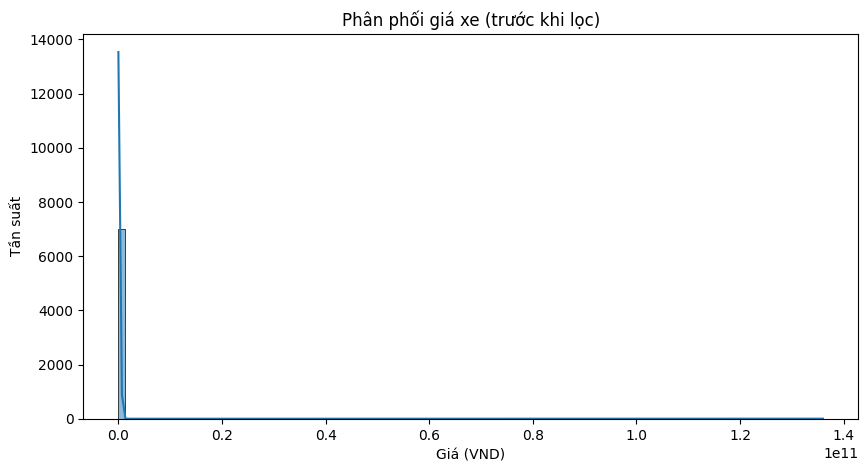

count    7.004000e+03
mean     4.928211e+07
std      1.625962e+09
min      1.000000e+00
25%      8.500000e+06
50%      1.650000e+07
75%      3.200000e+07
max      1.360000e+11
Name: price, dtype: float64


In [171]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.histplot(df['price'], bins=100, kde=True)
plt.title("Phân phối giá xe (trước khi lọc)")
plt.xlabel("Giá (VND)")
plt.ylabel("Tần suất")
plt.show()

print(df['price'].describe())


In [172]:
from scipy.stats import skew, kurtosis

price_skew = skew(df['price'])
price_kurt = kurtosis(df['price'])

print(f"Độ lệch (skewness): {price_skew:.2f}")
print(f"Độ nhọn (kurtosis): {price_kurt:.2f}")


Độ lệch (skewness): 83.48
Độ nhọn (kurtosis): 6977.11


#### => Phân phối lệch phải mạnh, nhọn

### 3. Feature engineering

In [173]:
# Check for numbers of unique values for each column
for col in df.columns:
    print(f'{col}: {df[col].nunique()}')
    if df[col].nunique() < 38: 
        print(df[col].unique())

price: 729
min_price: 1304
max_price: 1347
brand: 34
['Piaggio' 'Honda' 'Yamaha' 'SYM' 'Kawasaki' 'Hãng khác' 'KTM' 'Suzuki'
 'Peugeot' 'Triumph' 'Victory' 'Kymco' 'Taya' 'Ducati' 'Benelli' 'Hyosung'
 'Detech' 'Brixton' 'BMW' 'GPX' 'Halim' 'Keeway' 'Sanda' 'Harley Davidson'
 'Nioshima' 'Daelim' 'VinFast' 'Sachs' 'Royal Enfield' 'Bazan' 'RebelUSA'
 'Vento' 'Aprilia' 'Visitor']
model: 171
registration_year: 77
mileage_km: 1295
condition: 1
['Đã sử dụng']
bike_type: 3
['Tay ga' 'Xe số' 'Tay côn/Moto']
engine_capacity: 7
['100 - 175 cc' 'Dưới 50 cc' '50 - 100 cc' 'Trên 175 cc' 'Không biết rõ'
 'Đang cập nhật' 'Nhật Bản']
origin: 12
['Đang cập nhật' 'Nhật Bản' 'Việt Nam' 'Nước khác' 'Đài Loan' 'Thái Lan'
 'Trung Quốc' 'Hàn Quốc' 'Ấn Độ' 'Đức' 'Mỹ' 'Bảo hành hãng']


In [174]:
df['engine_capacity'][df['engine_capacity'] == 'Nhật Bản'].count()

1

In [175]:
df = df[~df['engine_capacity'].astype(str).str.contains('Nhật Bản', case=False, na=False)]

In [176]:
# Thay thế các giá trị không rõ trong cột 'engine_capacity'
df['engine_capacity'] = df['engine_capacity'].replace(
    ['Không biết rõ', 'Đang cập nhật'],
    'Unknown'
)

In [177]:
df['engine_capacity'].unique()

array(['100 - 175 cc', 'Dưới 50 cc', '50 - 100 cc', 'Trên 175 cc',
       'Unknown'], dtype=object)

In [178]:
df['origin'][df['origin'] == 'Bảo hành hãng'].count()

8

In [179]:
df = df[~df['origin'].astype(str).str.contains('Bảo hành hãng', case=False, na=False)]

In [180]:
# Thay thế các giá trị không rõ trong cột 'origin'
df['origin'] = df['origin'].replace(
    ['Đang cập nhật', 'Nước khác'],
    'Nước khác'
)

In [181]:
df['origin'].unique()

array(['Nước khác', 'Nhật Bản', 'Việt Nam', 'Đài Loan', 'Thái Lan',
       'Trung Quốc', 'Hàn Quốc', 'Ấn Độ', 'Đức', 'Mỹ'], dtype=object)

In [182]:
df['registration_year'].unique()

array(['2024', '2019', '2023', '2021', '2018', '2013', '2003', '2015',
       '2020', 'trước năm 1980', '2005', '2016', '2014', '2001', '2022',
       '2008', '2010', '2011', '2009', '2012', '2004', '2017', '1998',
       '2007', '1997', '2025', '2006', '2000', 2019, 2012, 2002, 2018,
       2017, 2011, 2014, 2024, 2022, 2008, 2010, 2001, 2015, 2021, 2000,
       1998, 2016, 2020, 2009, 2013, 2023, 2007, 2006, 1997, 2005, 1996,
       '2002', '1995', '1996', 1999, 2004, 1994, 2003, '1987', '1993',
       '1990', '1992', '1999', '1981', '1982', '1994', 2025, 1995, '1986',
       '1991', '1985', '1989', '1984', '1988'], dtype=object)

In [183]:
# Chuẩn hóa registration_year
df['registration_year'] = (
    df['registration_year']
    .astype(str)
    .str.lower()
    .str.replace('trước năm', '1980', regex=False)  # thay cụm 'trước năm 1980' bằng '1980'
    .str.extract('(\d{4})')[0]                      # lấy 4 chữ số đầu tiên (nếu có)
)

In [184]:
# Chuyển sang numeric, những giá trị không chuyển được sẽ thành NaN
df['registration_year'] = pd.to_numeric(df['registration_year'], errors='coerce')

In [185]:
# Loại bỏ các giá trị không hợp lệ (nếu có, ví dụ >2025)
df.loc[(df['registration_year'] < 1980) | (df['registration_year'] > 2025), 'registration_year'] = np.nan

In [186]:
# Thêm biến age
df['age'] = 2025 - df['registration_year']  # update year if cần
# df['mileage_km'] = pd.to_numeric(df['mileage_km'], errors='coerce')

In [187]:
brand_counts = df['brand'].value_counts()
model_counts = df['model'].value_counts()

print("Số lượng brand:", len(brand_counts))
print("Số lượng model:", len(model_counts))

Số lượng brand: 34
Số lượng model: 171


In [188]:
print("Số lượng brand:", df['brand'].nunique())
print(df['brand'].value_counts().head(20))  # top 20 brand phổ biến


Số lượng brand: 34
brand
Honda              4309
Yamaha             1392
Piaggio             364
Suzuki              262
SYM                 235
Hãng khác           230
Kawasaki             52
Kymco                25
Detech               15
GPX                  11
Ducati               10
Halim                10
Triumph               9
Benelli               8
BMW                   8
Daelim                8
Harley Davidson       7
Peugeot               6
Nioshima              5
Hyosung               5
Name: count, dtype: int64


In [189]:
# gom nhóm brand hiếm
brand_counts = df['brand'].value_counts()
rare_brands = brand_counts[brand_counts < 50].index
df['brand_grouped'] = df['brand'].replace(rare_brands, 'Hãng khác')

In [190]:
print("\nSố lượng model:", df['model'].nunique())
print(df['model'].value_counts().head(20))  # top 20 model phổ biến


Số lượng model: 171
model
Wave         725
SH           627
Air Blade    603
Dòng khác    492
Exciter      474
Vision       281
Future       238
Vario        226
Sirius       211
Lead         205
Vespa        203
Dream        182
Winner X     177
Winner       157
Nouvo        150
Cub          146
Mio          108
Attila        94
SH Mode       79
Janus         74
Name: count, dtype: int64


In [191]:
def group_model(x):
    counts = x.value_counts()
    rare_models = counts[counts < 100].index
    return x.replace(rare_models, 'Dòng khác')

df['model_grouped'] = df.groupby('brand_grouped')['model'].transform(group_model)

In [192]:
# Đếm tần suất từng model_grouped
model_grouped_counts = df['model_grouped'].value_counts()

# Số bản ghi thuộc "Dòng khác"
dong_khac_count = model_grouped_counts.get('Dòng khác', 0)

# Tổng số bản ghi
total_records = len(df)

# Tính tỷ lệ %
dong_khac_percent = dong_khac_count / total_records * 100

print(f"Tổng bản ghi: {total_records:,}")
print(f"Số bản ghi 'Dòng khác': {dong_khac_count:,}")
print(f"Tỷ lệ 'Dòng khác' chiếm: {dong_khac_percent:.2f}%")

Tổng bản ghi: 6,995
Số bản ghi 'Dòng khác': 2,285
Tỷ lệ 'Dòng khác' chiếm: 32.67%


In [193]:
brand_counts = df['brand_grouped'].value_counts()
model_counts = df['model_grouped'].value_counts()

print("Số lượng brand:", len(brand_counts))
print("Số lượng model:", len(model_counts))

Số lượng brand: 7
Số lượng model: 17


In [194]:
df['segment'] = df['brand_grouped'] + '_' + df['model_grouped']
print(df['segment'].nunique())
print(df['segment'].value_counts().head(20))

23
segment
Honda_Dòng khác        745
Honda_Wave             725
Honda_SH               627
Honda_Air Blade        603
Yamaha_Exciter         474
Yamaha_Dòng khác       449
Hãng khác_Dòng khác    381
Honda_Vision           281
Suzuki_Dòng khác       262
Honda_Future           238
SYM_Dòng khác          235
Honda_Vario            226
Yamaha_Sirius          211
Honda_Lead             205
Piaggio_Vespa          203
Honda_Dream            182
Honda_Winner X         177
Piaggio_Dòng khác      161
Honda_Winner           157
Yamaha_Nouvo           150
Name: count, dtype: int64


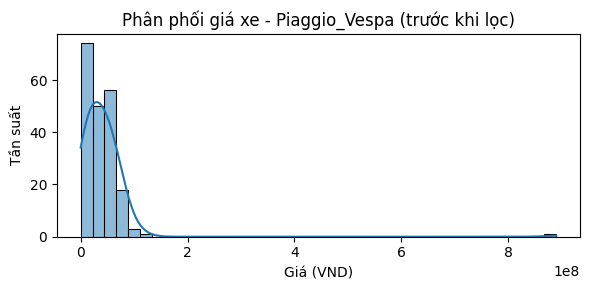

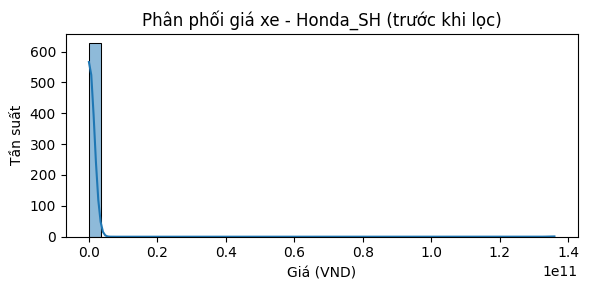

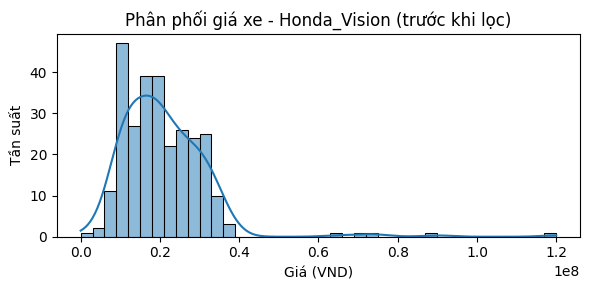

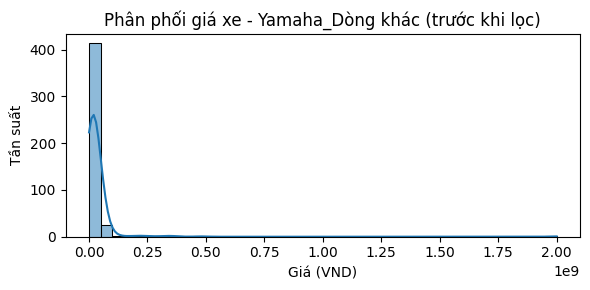

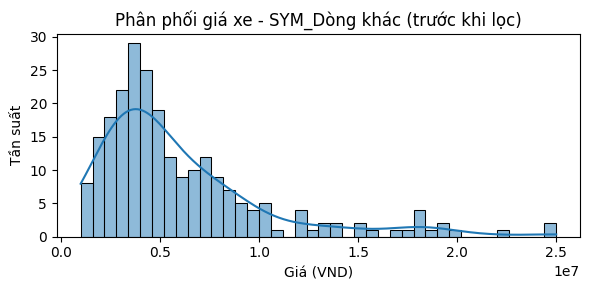

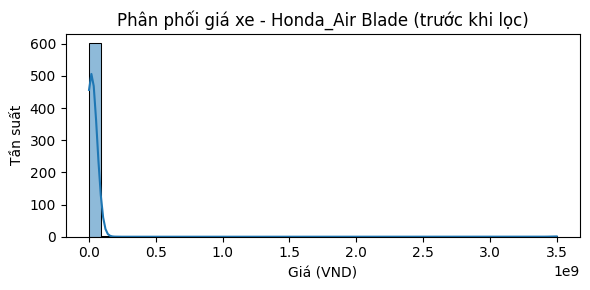

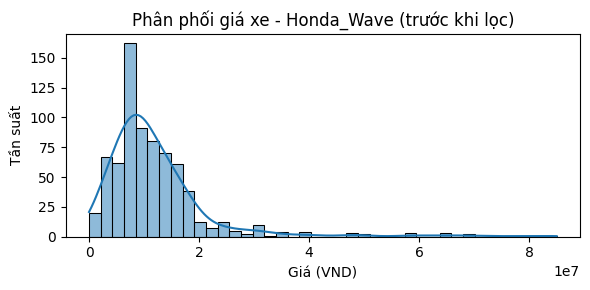

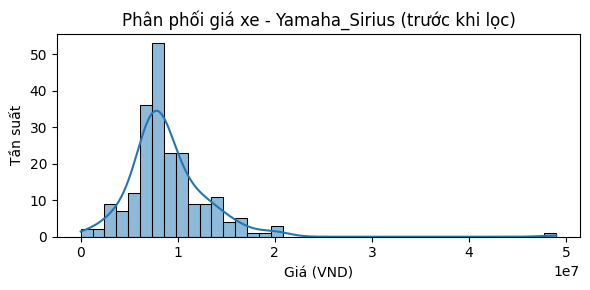

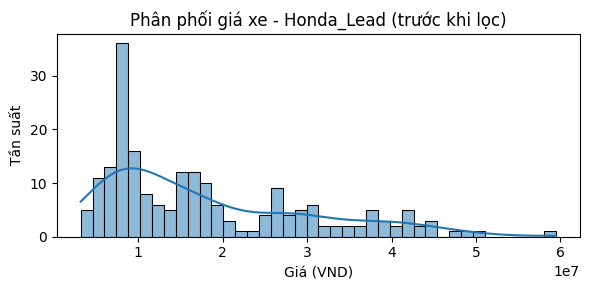

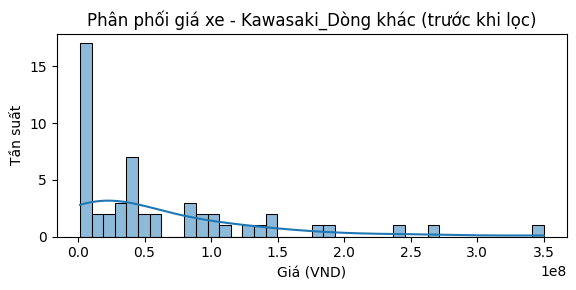

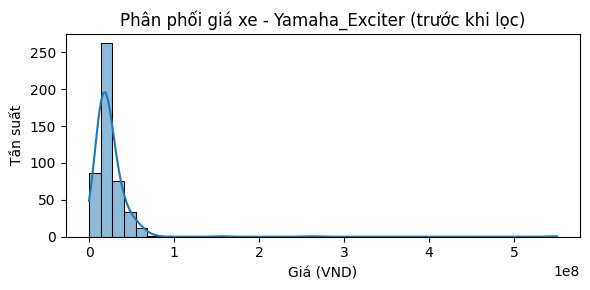

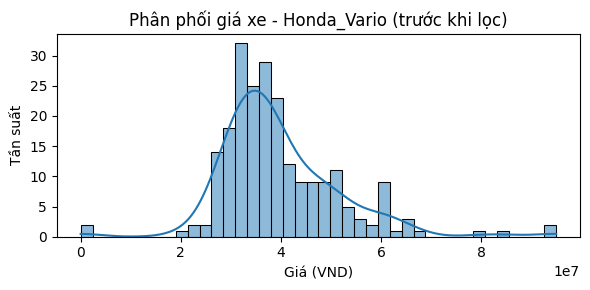

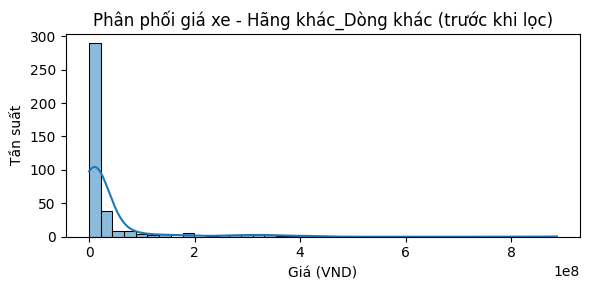

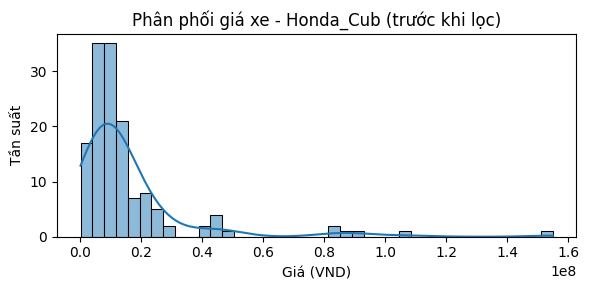

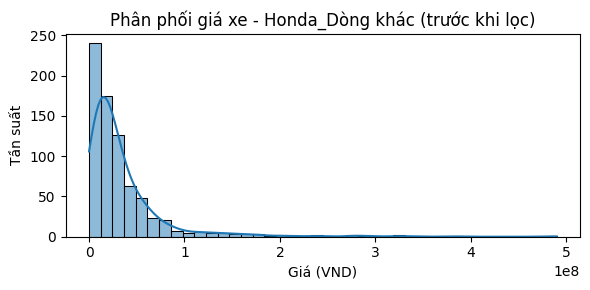

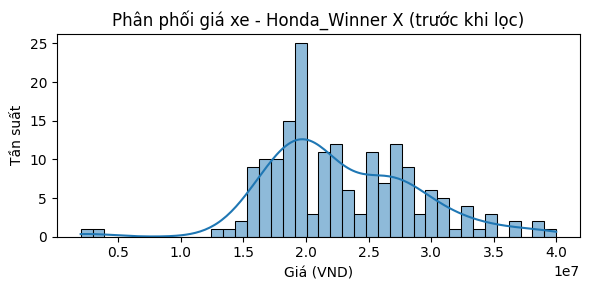

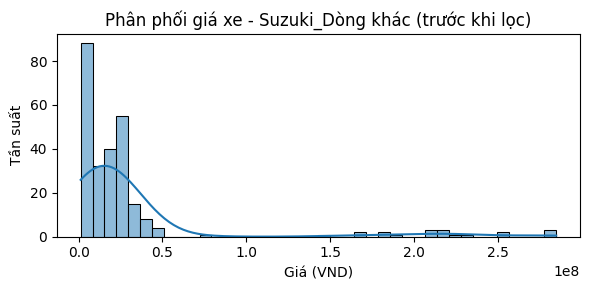

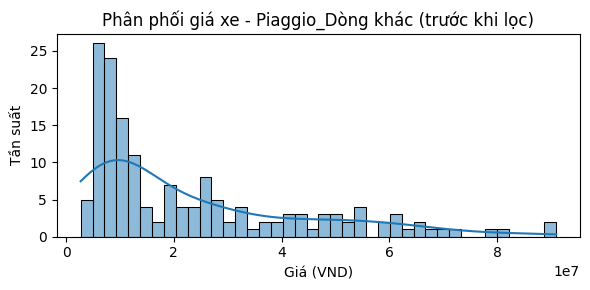

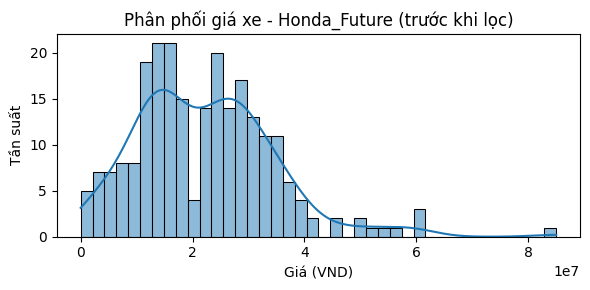

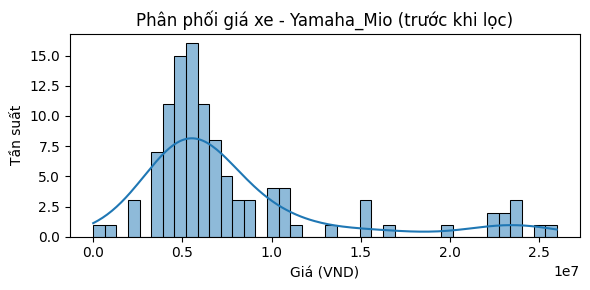

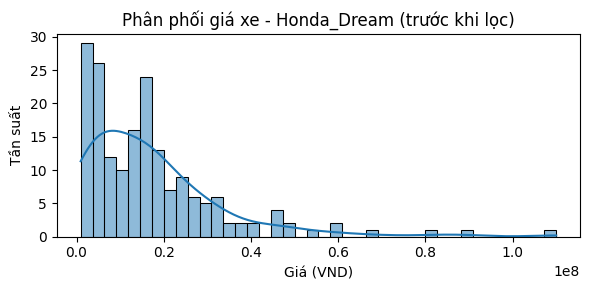

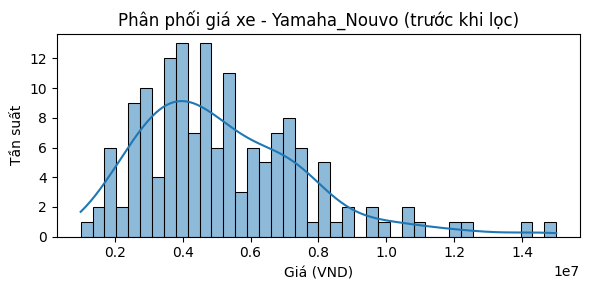

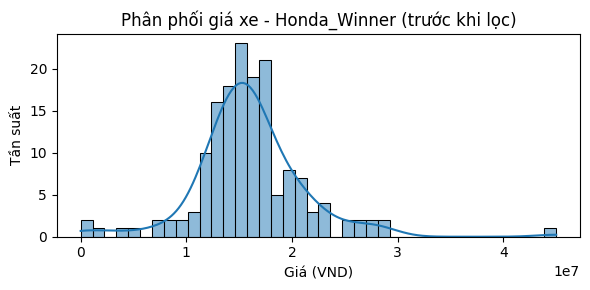

In [195]:
# PHÂN PHỐI
segments = df['segment'].unique()
for seg in segments:
    subset = df[df['segment'] == seg]
    plt.figure(figsize=(6,3))
    sns.histplot(subset['price'], bins=40, kde=True)
    plt.title(f"Phân phối giá xe - {seg} (trước khi lọc)")
    plt.xlabel("Giá (VND)")
    plt.ylabel("Tần suất")
    plt.tight_layout()
    plt.show()


In [196]:
df['segment'].value_counts()

segment
Honda_Dòng khác        745
Honda_Wave             725
Honda_SH               627
Honda_Air Blade        603
Yamaha_Exciter         474
Yamaha_Dòng khác       449
Hãng khác_Dòng khác    381
Honda_Vision           281
Suzuki_Dòng khác       262
Honda_Future           238
SYM_Dòng khác          235
Honda_Vario            226
Yamaha_Sirius          211
Honda_Lead             205
Piaggio_Vespa          203
Honda_Dream            182
Honda_Winner X         177
Piaggio_Dòng khác      161
Honda_Winner           157
Yamaha_Nouvo           150
Honda_Cub              143
Yamaha_Mio             108
Kawasaki_Dòng khác      52
Name: count, dtype: int64

Text(0.5, 1.0, 'Phân phối giá xe (sau khi lọc và chuẩn hóa log)')

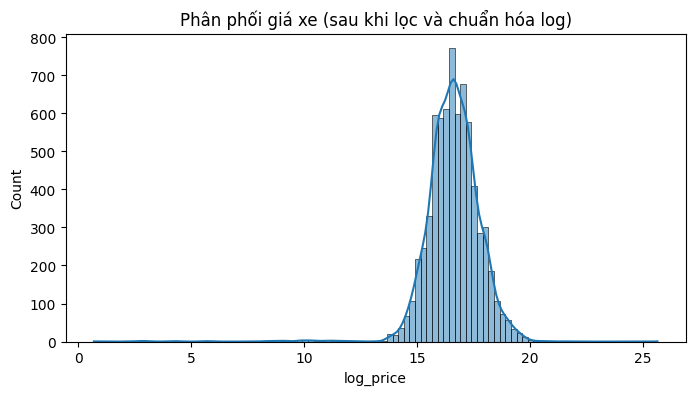

In [197]:
# # Thêm đặc trưng giá trung bình theo brand
# brand_mean = df.groupby('brand')['price'].mean().rename('brand_meanprice')
# df = df.merge(brand_mean, on='brand', how='left')
df['log_price'] = np.log1p(df['price'])  # target
brand_mean_log = df.groupby('brand')['log_price'].mean().rename('brand_meanprice')
df = df.merge(brand_mean_log, on='brand', how='left')

# trực quan
plt.figure(figsize=(8,4))
sns.histplot(df['log_price'], bins=100, kde=True)
plt.title('Phân phối giá xe (sau khi lọc và chuẩn hóa log)')

In [198]:
df.duplicated().sum()

72

In [199]:
df = df.drop_duplicates().reset_index(drop=True)

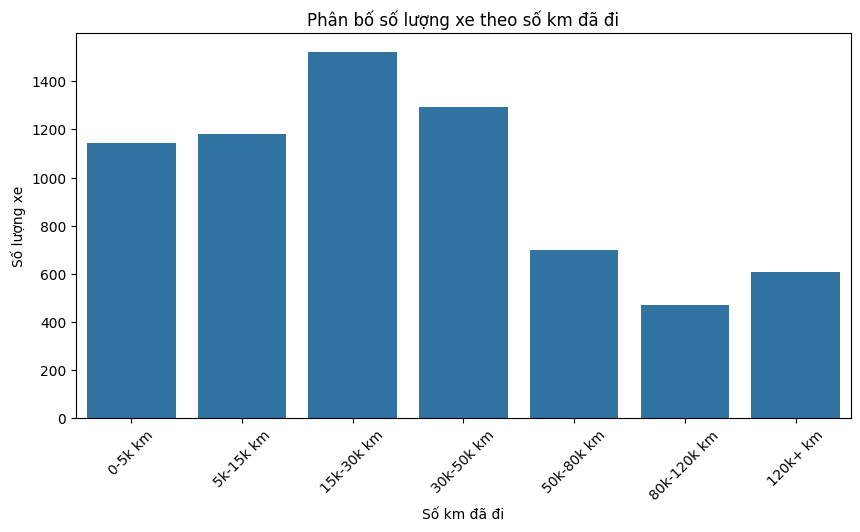

In [200]:
# ---- Đếm số lượng theo mileage bin
# ---- Tạo mileage bins
mileage_bins = [0, 5000, 15000, 30000, 50000, 80000, 120000, df['mileage_km'].max()]
mileage_labels = [
    "0-5k km", "5k-15k km", "15k-30k km", "30k-50k km",
    "50k-80k km", "80k-120k km", "120k+ km"
]

df['mileage_bin'] = pd.cut(
    df['mileage_km'], bins=mileage_bins, labels=mileage_labels, include_lowest=True
)
mileage_bin_count = (
    df.groupby('mileage_bin')
        .size()
        .reset_index(name='Số lượng xe')
        .sort_values('mileage_bin', ascending=True)
)


# ---- Biểu đồ
fig_mi, ax_mi = plt.subplots(figsize=(10, 5))
sns.barplot(data=mileage_bin_count, x='mileage_bin', y='Số lượng xe')
ax_mi.set_xlabel("Số km đã đi")
ax_mi.set_ylabel("Số lượng xe")
ax_mi.set_title("Phân bố số lượng xe theo số km đã đi")
plt.xticks(rotation=45)
plt.savefig("mileage_bin_stats.png", bbox_inches='tight')

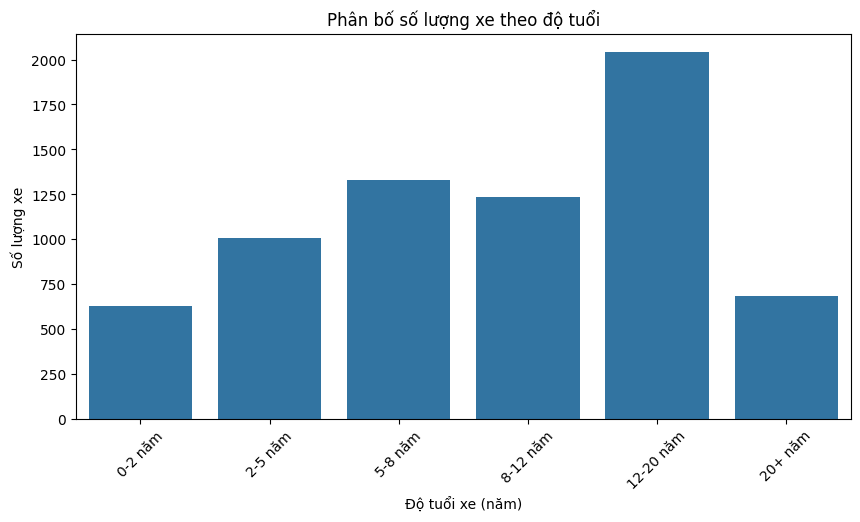

In [201]:
# ---- Tạo age bins
age_bins = [0, 2, 5, 8, 12, 20, df['age'].max()]
age_labels = ["0-2 năm", "2-5 năm", "5-8 năm", "8-12 năm", "12-20 năm", "20+ năm"]

df['age_bin'] = pd.cut(
    df['age'], bins=age_bins, labels=age_labels, include_lowest=True
)

# ---- Đếm số lượng theo age bin
age_bin_count = (
    df.groupby('age_bin')
        .size()
        .reset_index(name='Số lượng xe')
        .sort_values('age_bin', ascending=True)
)


# ---- Biểu đồ
fig_age, ax_age = plt.subplots(figsize=(10, 5))
sns.barplot(data=age_bin_count, x='age_bin', y='Số lượng xe')
ax_age.set_xlabel("Độ tuổi xe (năm)")
ax_age.set_ylabel("Số lượng xe")
ax_age.set_title("Phân bố số lượng xe theo độ tuổi")
plt.xticks(rotation=45)
plt.savefig("age_bin_stats.png", bbox_inches='tight')


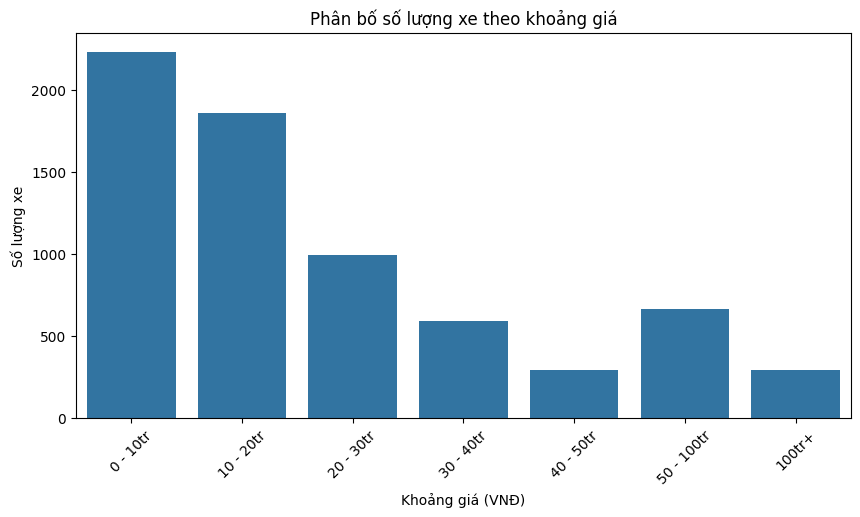

In [202]:
# ---- Tạo price bins
price_bins = [0, 10e6, 20e6, 30e6, 40e6, 50e6, 100e6, df['price'].max()]
price_labels = [
    "0 - 10tr", "10 - 20tr", "20 - 30tr", "30 - 40tr", 
    "40 - 50tr", "50 - 100tr", "100tr+"
]

df['price_bin'] = pd.cut(df['price'], bins=price_bins, labels=price_labels, include_lowest=True)

# ---- Đếm số lượng xe trong từng bin
price_bin_count = (
    df
        .groupby('price_bin')
        .size()
        .reset_index(name='Số lượng xe')
        .sort_values('price_bin', ascending=True)
)

# ---- Biểu đồ phân bố xe theo price bin
fig2, ax2 = plt.subplots(figsize=(10, 5))
sns.barplot(data=price_bin_count, x='price_bin', y='Số lượng xe')
ax2.set_xlabel("Khoảng giá (VNĐ)")
ax2.set_ylabel("Số lượng xe")
ax2.set_title("Phân bố số lượng xe theo khoảng giá")
plt.xticks(rotation=45)
plt.savefig("price_bin_stats.png", bbox_inches='tight')

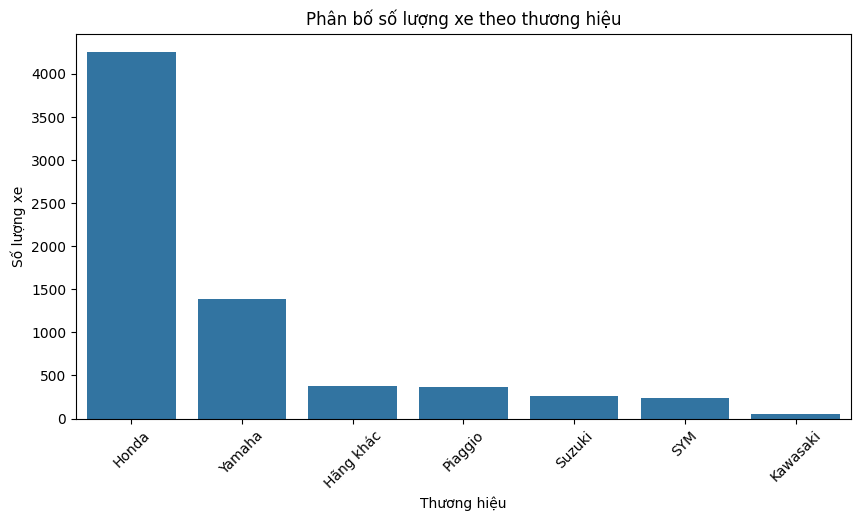

In [203]:
# --- Tạo bảng đếm số lượng xe theo thương hiệu ---
brand_grouped = (
    df
        .groupby('brand_grouped')
        .size()
        .reset_index(name='Số lượng xe')
        .rename(columns={'brand_grouped': 'Thương hiệu'})
        .sort_values('Số lượng xe', ascending=False)
)


fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(data=brand_grouped, x='Thương hiệu', y='Số lượng xe', ax=ax)

ax.set_xlabel("Thương hiệu")
ax.set_ylabel("Số lượng xe")
ax.set_title("Phân bố số lượng xe theo thương hiệu")
plt.xticks(rotation=45)
plt.savefig("brand_grouped_count.png", bbox_inches='tight')


In [204]:
# 3. Prepare features for regression
cat_cols = ['segment','bike_type','condition','origin','engine_capacity']
num_cols = ['age','mileage_km','min_price','max_price','brand_meanprice']

In [205]:
# Fillna cho numeric và categorical
df[num_cols] = df[num_cols].fillna(df[num_cols].median())
for c in cat_cols:
    df[c] = df[c].fillna('NA')

In [206]:
df.head()

,price,min_price,max_price,brand,model,registration_year,mileage_km,condition,bike_type,engine_capacity,origin,age,brand_grouped,model_grouped,segment,log_price,brand_meanprice,mileage_bin,age_bin,price_bin
0,66000000.0,72530000.0,85140000.0,Piaggio,Vespa,2024.0,14000,Đã sử dụng,Tay ga,100 - 175 cc,Nước khác,1.0,Piaggio,Vespa,Piaggio_Vespa,18.005165,16.844081,5k-15k km,0-2 năm,50 - 100tr
1,79500000.0,62760000.0,73680000.0,Honda,SH,2019.0,28000,Đã sử dụng,Tay ga,100 - 175 cc,Nước khác,6.0,Honda,SH,Honda_SH,18.191268,16.775025,15k-30k km,5-8 năm,50 - 100tr
2,37000000.0,28000000.0,32860000.0,Honda,Vision,2023.0,12000,Đã sử dụng,Tay ga,100 - 175 cc,Nước khác,2.0,Honda,Vision,Honda_Vision,17.426428,16.775025,5k-15k km,0-2 năm,30 - 40tr
3,45000000.0,43100000.0,50600000.0,Piaggio,Vespa,2019.0,60000,Đã sử dụng,Tay ga,100 - 175 cc,Nước khác,6.0,Piaggio,Vespa,Piaggio_Vespa,17.622173,16.844081,50k-80k km,5-8 năm,40 - 50tr
4,23000000.0,17020000.0,19980000.0,Yamaha,Latte,2021.0,24000,Đã sử dụng,Tay ga,100 - 175 cc,Nhật Bản,4.0,Yamaha,Dòng khác,Yamaha_Dòng khác,16.951005,16.315514,15k-30k km,2-5 năm,20 - 30tr


In [207]:
df.shape

(6923, 20)

In [208]:
scaler = StandardScaler()
df_scaled_num = pd.DataFrame(
    scaler.fit_transform(df[num_cols]),
    columns=num_cols,
    index=df.index
)

In [209]:
# Mã hóa các biến phân loại
# One-hot encode
df_encoded = pd.get_dummies(df[cat_cols], drop_first=True)

In [210]:
X = pd.concat([df_encoded, df_scaled_num], axis=1)
# Log-transform
y_col = 'log_price'
y = df[y_col]

In [211]:
df_final = pd.concat([X,y], axis=1)

### 4. Model

In [212]:
# Chia train/test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [213]:
# Huấn luyện mô hình
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(
    n_estimators=100,
    max_depth=12,
    random_state=42,
    n_jobs=-1
)
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=12, n_jobs=-1, random_state=42)

In [214]:
# Đánh giá mô hình
# Chuyển về giá gốc
y_test_real = np.expm1(y_test)
y_pred_real = np.expm1(model.predict(X_test))

from sklearn.metrics import mean_absolute_error, r2_score
mae_real = mean_absolute_error(y_test_real, y_pred_real)
r2_real = r2_score(y_test_real, y_pred_real)

print(f"MAE (VND): {mae_real:,.0f}")
print(f"R2 (VND): {r2_real:.3f}")

MAE (VND): 10,780,946
R2 (VND): 0.432


In [215]:
print("Kiểm tra train/test:")
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

y_train_real = np.expm1(y_train)
y_pred_train_real = np.expm1(model.predict(X_train))

y_test_real = np.expm1(y_test)
y_pred_test_real = np.expm1(model.predict(X_test))

mae_train_real = mean_absolute_error(y_train_real, y_pred_train_real)
r2_train_real = r2_score(y_train_real, y_pred_train_real)

mae_test_real = mean_absolute_error(y_test_real, y_pred_test_real)
r2_test_real = r2_score(y_test_real, y_pred_test_real)

print(f"MAE train (VND): {mae_train_real:,.0f}, R2 train (VND): {r2_train_real:.3f}")
print(f"MAE test (VND): {mae_test_real:,.0f}, R2 test (VND): {r2_test_real:.3f}")

Kiểm tra train/test:
(5538, 42) (1385, 42)
(5538,) (1385,)
MAE train (VND): 30,271,084, R2 train (VND): 0.117
MAE test (VND): 10,780,946, R2 test (VND): 0.432


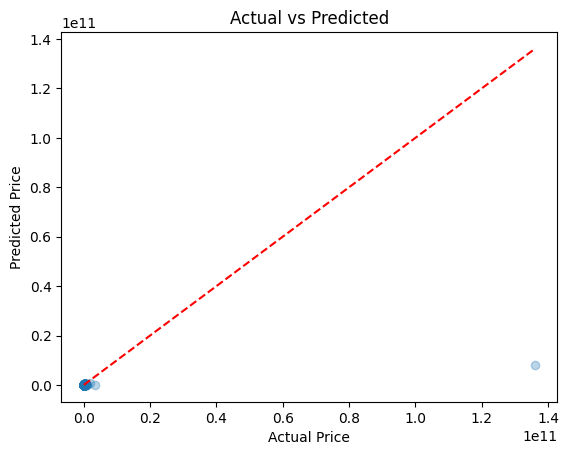

In [216]:
# Vẽ trực quan kết quả dự đoán và thực tế
# Predict lại toàn bộ để lấy residual
df['price_hat'] = np.expm1(model.predict(X))  
plt.scatter(df['price'], df['price_hat'], alpha=0.3)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted")
plt.plot([0, df['price'].max()], [0, df['price'].max()], 'r--')
plt.show()

In [217]:
# đánh giá từng segment

from sklearn.metrics import mean_absolute_percentage_error

def segment_metrics(x):
    r2 = r2_score(x['price'], x['price_hat'])
    mae = mean_absolute_error(x['price'], x['price_hat'])
    mape = mean_absolute_percentage_error(x['price'], x['price_hat']) * 100
    count = len(x)
    return pd.Series({'R2': r2, 'MAE': mae, 'MAPE (%)': mape, 'count': count})

seg_metrics = df.groupby('segment').apply(segment_metrics).reset_index()
print(seg_metrics.sort_values('R2', ascending=False).head(30))


                segment        R2           MAE      MAPE (%)  count
14    Piaggio_Dòng khác  0.923867  3.911855e+06  2.094280e+01  161.0
13   Kawasaki_Dòng khác  0.854531  1.409971e+07  3.350024e+01   52.0
5            Honda_Lead  0.812764  2.882160e+06  2.171438e+01  204.0
12  Hãng khác_Dòng khác  0.801753  1.088583e+07  2.624411e+05  378.0
16        SYM_Dòng khác  0.741137  1.474426e+06  3.028939e+01  234.0
17     Suzuki_Dòng khác  0.682506  1.121597e+07  3.731258e+01  258.0
18     Yamaha_Dòng khác  0.647962  9.416493e+06  3.154377e+02  447.0
8          Honda_Vision  0.642643  3.387018e+06  6.186316e+01  276.0
20           Yamaha_Mio  0.594338  2.403984e+06  1.130258e+02  108.0
11       Honda_Winner X  0.582144  2.824591e+06  1.568173e+01  174.0
3       Honda_Dòng khác  0.570605  1.056916e+07  1.163269e+05  737.0
9            Honda_Wave  0.569444  3.600169e+06  1.767405e+02  715.0
2           Honda_Dream  0.545244  6.504618e+06  5.217536e+01  181.0
21         Yamaha_Nouvo  0.509616 

#### => Dự đoán với random forest cho kết quả khá tốt, tuy nhiên có sự dự đoán chênh lệch khá nhiều giữa các dòng sản phẩm

### 4. Anomaly detection

In [218]:
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import StandardScaler, MinMaxScaler


In [219]:
# df['log_price'] = np.log1p(df['price'])  # target
# brand_mean_log = df.groupby('brand')['log_price'].mean().rename('brand_meanprice')
# df = df.merge(brand_mean_log, on='brand', how='left')

In [220]:
# Tính residual
df['resid'] = df['price'] - df['price_hat']

In [221]:
# 1. Residual z by segment (robust approach)
seg_stats = (
    df.groupby('segment')['resid']
      .agg(['median', 'std'])
      .reset_index()
      .rename(columns={'median':'resid_median', 'std':'resid_std'})
)

# Gộp trở lại với dữ liệu gốc
df = df.merge(seg_stats, on='segment', how='left')

# Chuẩn hóa residual theo từng segment
df['resid_z'] = (df['resid'] - df['resid_median']) / (df['resid_std'] + 1e-9)

In [222]:
# 2. Xác định outlier 0/1
z_clip = 3  # bạn có thể điều chỉnh ngưỡng
df['flag_resid'] = (df['resid_z'].abs() > z_clip).astype(int)

# Thống kê
n_outlier = df['flag_resid'].sum()
n_total = len(df)
print(f"Outlier theo residual z: {n_outlier}/{n_total} ({n_outlier/n_total:.2%})")

Outlier theo residual z: 109/6923 (1.57%)


In [223]:
# 2. P10 / P90, min/max violation
seg_price_stats = (
    df.groupby('segment')['price']
    .quantile([0.10, 0.90])
    .unstack(level=1)
    .reset_index()
    .rename(columns={0.10:'p10', 0.90:'p90'})
)
df = df.merge(seg_price_stats, on='segment', how='left')
df['flag_minmax'] = ((df['price'] < df['min_price']) | (df['price'] > df['max_price'])).astype(int)
df['flag_p10p90'] = ((df['price'] < df['p10']) | (df['price'] > df['p90'])).astype(int)

In [224]:
# business rule số km đã đi

TH = {
    # Business rule (mileage)
    "min_km_per_year": 200,
    "max_km_per_year": 20000,
}

df['flag_mileage_low'] = (
    df['mileage_km'] < df['age'] * TH["min_km_per_year"]
).astype(int)

df['flag_mileage_high'] = (
    df['mileage_km'] > df['age'] * TH["max_km_per_year"]
).astype(int)

# Nếu 1 trong 2 rule vi phạm → flag_br = 1
df['flag_br'] = (
    (df['flag_mileage_low'] == 1) | 
    (df['flag_mileage_high'] == 1)
).astype(int)

In [225]:
df.head()

,price,min_price,max_price,brand,model,registration_year,mileage_km,condition,bike_type,engine_capacity,...,resid_std,resid_z,flag_resid,p10,p90,flag_minmax,flag_p10p90,flag_mileage_low,flag_mileage_high,flag_br
0,66000000.0,72530000.0,85140000.0,Piaggio,Vespa,2024.0,14000,Đã sử dụng,Tay ga,100 - 175 cc,...,5.945494e+07,-0.262116,0,7000000.0,68000000.0,1,0,0,0,0
1,79500000.0,62760000.0,73680000.0,Honda,SH,2019.0,28000,Đã sử dụng,Tay ga,100 - 175 cc,...,5.153336e+09,-0.001007,0,40200000.0,157400000.0,1,0,0,0,0
2,37000000.0,28000000.0,32860000.0,Honda,Vision,2023.0,12000,Đã sử dụng,Tay ga,100 - 175 cc,...,7.124825e+06,1.060817,0,10000000.0,32500000.0,1,1,0,0,0
3,45000000.0,43100000.0,50600000.0,Piaggio,Vespa,2019.0,60000,Đã sử dụng,Tay ga,100 - 175 cc,...,5.945494e+07,0.000379,0,7000000.0,68000000.0,0,0,0,0,0
4,23000000.0,17020000.0,19980000.0,Yamaha,Latte,2021.0,24000,Đã sử dụng,Tay ga,100 - 175 cc,...,6.050791e+07,0.074303,0,6000000.0,45000000.0,1,0,0,0,0


In [226]:
# 3. Unsupervised models (subset of features)
unsup_feats = ['age','mileage_km','resid_z']
X_unsup = df[unsup_feats].fillna(0).values
# chuẩn hóa
scaler = StandardScaler()
Xu = scaler.fit_transform(X_unsup)

In [227]:
# 3.1. IsolationForest
if_model = IsolationForest(
    n_estimators=200,
    contamination=0.2,  # 20% nghi ngờ là outlier
    random_state=42
)
if_model.fit(Xu)
df['if_score'] = -if_model.score_samples(Xu)  # larger -> more anomalous

# Xác định outlier 0/1 dựa trên contamination
df['flag_if'] = if_model.predict(Xu)
# IsolationForest trả về 1 cho bình thường, -1 cho outlier -> chuyển về 0/1
df['flag_if'] = (df['flag_if'] == -1).astype(int)

# Kiểm tra số outlier
n_if_outlier = df['flag_if'].sum()
print(f"Số outlier theo IsolationForest: {n_if_outlier} / {len(df)} ({n_if_outlier/len(df):.2%})")

Số outlier theo IsolationForest: 1385 / 6923 (20.01%)


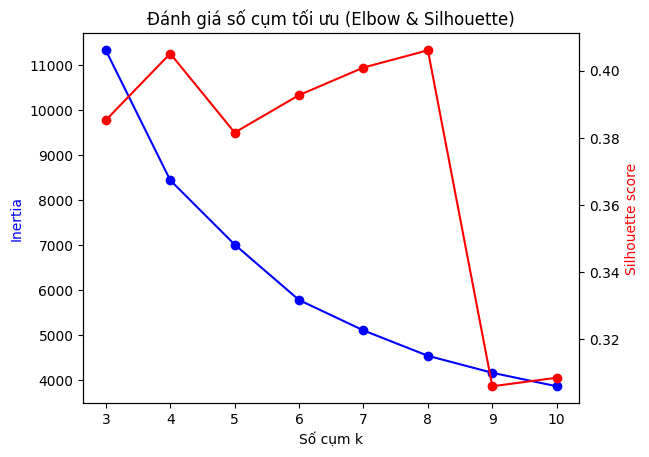

Số cụm tối ưu theo Silhouette: 8


In [228]:
# kmeans
# xem số cụm hợp lý
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# --- Tìm số cụm tối ưu ---
K_range = range(3, 11)
inertias = []
silhouette_scores = []

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(Xu)
    
    # inertia: tổng bình phương khoảng cách tới tâm cụm
    inertias.append(kmeans.inertia_)
    
    # silhouette score: đo độ tách biệt giữa các cụm
    if len(set(labels)) > 1:
        score = silhouette_score(Xu, labels)
    else:
        score = np.nan
    silhouette_scores.append(score)

# --- Vẽ biểu đồ đánh giá ---
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(K_range, inertias, 'bo-', label='Inertia (Elbow)')
ax2.plot(K_range, silhouette_scores, 'ro-', label='Silhouette')

ax1.set_xlabel('Số cụm k')
ax1.set_ylabel('Inertia', color='b')
ax2.set_ylabel('Silhouette score', color='r')
plt.title('Đánh giá số cụm tối ưu (Elbow & Silhouette)')
plt.show()

# --- Chọn số cụm tối ưu ---
best_k = K_range[int(np.nanargmax(silhouette_scores))]
print(f"Số cụm tối ưu theo Silhouette: {best_k}")

##### => Số cụm tối ưu hợp lý nhất là k = 4, vì:

- Silhouette đạt đỉnh tại k=4 (~0.41, cao nhất toàn đồ thị),

- Inertia ở k=4 vẫn còn giảm đáng kể so với k=3, nghĩa là vẫn có lợi khi chia nhỏ thêm.

In [229]:

# --- KMeans clustering ---
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(Xu)
df['kmeans_cluster'] = cluster_labels

# --- Cluster statistics ---
cluster_stats = []
for k in range(n_clusters):
    cluster_points = Xu[cluster_labels == k]
    cluster_size = len(cluster_points)
    cluster_center = cluster_points.mean(axis=0)
    distances = np.linalg.norm(cluster_points - cluster_center, axis=1)
    radius_95 = np.percentile(distances, 95)
    
    cluster_stats.append({
        'cluster': k,
        'size': cluster_size,
        'center': cluster_center,
        'radius_95': radius_95
    })

cluster_stats = pd.DataFrame(cluster_stats)

In [230]:
# --- Outlier detection ---
alpha = 95
min_cluster_ratio = 0.1  # 10% tổng dữ liệu
n_total = len(df)
outlier_flags = np.zeros(n_total, dtype=int)

for stat in cluster_stats.itertuples():
    cluster_idx = stat.cluster
    cluster_points_idx = np.where(cluster_labels == cluster_idx)[0]
    cluster_size_ratio = stat.size / n_total
    
    if cluster_size_ratio < min_cluster_ratio:
        # Tiêu chí 1: cluster quá nhỏ -> tất cả là outlier
        outlier_flags[cluster_points_idx] = 1
    else:
        # Tiêu chí 2: tính khoảng cách tới tâm cụm
        distances = np.linalg.norm(Xu[cluster_points_idx] - stat.center, axis=1)
        threshold = np.percentile(distances, alpha)
        outlier_flags[cluster_points_idx[distances > threshold]] = 1

# Gán flag vào df
df['flag_kmeans'] = outlier_flags

# Thống kê
print(f"Tổng số outlier theo KMeans: {df['flag_kmeans'].sum()} / {len(df)}")

Tổng số outlier theo KMeans: 728 / 6923


In [231]:
# 3.2. Local Outlier Factor
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.2, novelty=False)
lof_fit = lof.fit_predict(Xu)  # -1 outlier, 1 bình thường
df['lof_score'] = -lof.negative_outlier_factor_

# Flag outlier 0/1
df['flag_lof'] = (lof_fit == -1).astype(int)

# Kiểm tra số outlier
n_lof_outlier = df['flag_lof'].sum()
print(f"Số outlier theo LOF: {n_lof_outlier} / {len(df)} ({n_lof_outlier/len(df):.2%})")

Số outlier theo LOF: 1385 / 6923 (20.01%)


In [232]:
# Tổng hợp điểm 3 phương pháp phân cụm

df['flag_unsup'] = ((df[['flag_if', 'flag_lof', 'flag_kmeans']].sum(axis=1)) > 1).astype(int)

# Kiểm tra thống kê
print(df['flag_unsup'].value_counts())

flag_unsup
0    6011
1     912
Name: count, dtype: int64


In [233]:
# --- Thống kê outlier sau khi gán flag ---
total_n = len(df)
minmax_n = df['flag_minmax'].sum()
p10p90_n = df['flag_p10p90'].sum()
resi_n = df['flag_resid'].sum()
unsup_n = df['flag_unsup'].sum()
br_n = df['flag_br'].sum()

print(f"Tổng số bản ghi: {total_n:,}")
print(f"Số outlier theo Min/Max: {minmax_n:,} ({minmax_n/total_n:.2%})")
print(f"Số outlier theo P10–P90: {p10p90_n:,} ({p10p90_n/total_n:.2%})")
print(f"Số outlier theo Residual Z: {resi_n:,} ({resi_n/total_n:.2%})")
print(f"Số outlier theo Unsupervised (IF+LOF+KMeans): {unsup_n:,} ({unsup_n/total_n:.2%})")
print(f"Số outlier theo Business Rule: {br_n:,} ({br_n/total_n:.2%})")

# --- Thống kê chi tiết theo segment ---
seg_flags = (
    df.groupby('segment')[['flag_minmax', 'flag_p10p90', 'flag_resid', 'flag_unsup','flag_br']]
      .sum()
      .reset_index()
)

# Thêm tổng số bản ghi theo segment
seg_counts = (
    df['segment'].value_counts()
      .rename('total')
      .reset_index()
      .rename(columns={'index': 'segment'})
)
seg_flags = seg_flags.merge(seg_counts, on='segment', how='left')

# Tính tỷ lệ %
seg_flags['pct_minmax'] = seg_flags['flag_minmax'] / seg_flags['total'] * 100
seg_flags['pct_p10p90'] = seg_flags['flag_p10p90'] / seg_flags['total'] * 100
seg_flags['pct_resid'] = seg_flags['flag_resid'] / seg_flags['total'] * 100
seg_flags['pct_unsup'] = seg_flags['flag_unsup'] / seg_flags['total'] * 100
seg_flags['pct_br'] = seg_flags['flag_br'] / seg_flags['total'] * 100

# In kết quả
print("\n--- Thống kê outlier theo segment ---")
print(seg_flags.head(20).sort_values('pct_unsup', ascending=False).round(2).to_string(index=False))

Tổng số bản ghi: 6,923
Số outlier theo Min/Max: 4,994 (72.14%)
Số outlier theo P10–P90: 1,358 (19.62%)
Số outlier theo Residual Z: 109 (1.57%)
Số outlier theo Unsupervised (IF+LOF+KMeans): 912 (13.17%)
Số outlier theo Business Rule: 1,192 (17.22%)

--- Thống kê outlier theo segment ---
            segment  flag_minmax  flag_p10p90  flag_resid  flag_unsup  flag_br  total  pct_minmax  pct_p10p90  pct_resid  pct_unsup  pct_br
          Honda_Cub          128           30           4          58       26    142       90.14       21.13       2.82      40.85   18.31
 Kawasaki_Dòng khác           28           12           2          15       14     52       53.85       23.08       3.85      28.85   26.92
        Honda_Dream          173           36           4          46       34    181       95.58       19.89       2.21      25.41   18.78
       Honda_Winner          109           32           1          33       31    154       70.78       20.78       0.65      21.43   20.13
  Piaggio_Dòn

In [234]:
# 4. Score components and final score
df['score_resid'] = df['flag_resid']
df['score_minmax'] = df['flag_minmax']
df['score_p10p90'] = df['flag_p10p90']
df['score_unsup'] = df['flag_unsup']

In [235]:
# 5. Weighted combination
w1, w2, w3, w4 = 0.4, 0.20, 0.20, 0.20
df['score_model_based'] = 100 * (
    w1*df['score_resid'] +
    w2*df['score_minmax'] +
    w3*df['score_p10p90'] +
    w4*df['score_unsup']
)
df['score_business_based'] = 100 * df['flag_br']
df['final_score'] = df['score_model_based'] + df['score_business_based']

In [236]:
df.groupby('segment')['final_score'].describe()


,count,mean,std,min,25%,50%,75%,max
segment,,,,,,,,
Honda_Air Blade,595.0,34.991597,42.336534,0.0,20.0,20.0,40.0,200.0
Honda_Cub,142.0,49.859155,43.122552,0.0,20.0,40.0,60.0,160.0
Honda_Dream,181.0,47.845304,44.600677,0.0,20.0,20.0,40.0,200.0
Honda_Dòng khác,737.0,38.724559,42.400797,0.0,20.0,20.0,40.0,200.0
Honda_Future,236.0,40.423729,46.143054,0.0,0.0,20.0,40.0,160.0
Honda_Lead,204.0,40.392157,48.705844,0.0,20.0,20.0,40.0,200.0
Honda_SH,615.0,31.772358,36.801433,0.0,20.0,20.0,40.0,160.0
Honda_Vario,224.0,33.482143,41.866965,0.0,0.0,20.0,40.0,200.0
Honda_Vision,276.0,32.681159,41.464813,0.0,0.0,20.0,40.0,200.0


In [237]:
df.head()

,price,min_price,max_price,brand,model,registration_year,mileage_km,condition,bike_type,engine_capacity,...,lof_score,flag_lof,flag_unsup,score_resid,score_minmax,score_p10p90,score_unsup,score_model_based,score_business_based,final_score
0,66000000.0,72530000.0,85140000.0,Piaggio,Vespa,2024.0,14000,Đã sử dụng,Tay ga,100 - 175 cc,...,1.153838,0,0,0,1,0,0,20.0,0,20.0
1,79500000.0,62760000.0,73680000.0,Honda,SH,2019.0,28000,Đã sử dụng,Tay ga,100 - 175 cc,...,0.989025,0,0,0,1,0,0,20.0,0,20.0
2,37000000.0,28000000.0,32860000.0,Honda,Vision,2023.0,12000,Đã sử dụng,Tay ga,100 - 175 cc,...,0.989551,0,0,0,1,1,0,40.0,0,40.0
3,45000000.0,43100000.0,50600000.0,Piaggio,Vespa,2019.0,60000,Đã sử dụng,Tay ga,100 - 175 cc,...,1.136777,0,0,0,0,0,0,0.0,0,0.0
4,23000000.0,17020000.0,19980000.0,Yamaha,Latte,2021.0,24000,Đã sử dụng,Tay ga,100 - 175 cc,...,1.389816,1,0,0,1,0,0,20.0,0,20.0


In [238]:
# Ngưỡng xác định bản ghi bất thường
threshold = 50
df['is_outlier'] = df['final_score'] >= threshold

# --- Tổng thể ---
total_records = len(df)
outlier_count = df['is_outlier'].sum()
outlier_ratio = 100 * outlier_count / total_records

print("=== Tổng thể ===")
print(f"Tổng số bản ghi: {total_records:,}")
print(f"Số bản ghi bất thường: {outlier_count:,} ({outlier_ratio:.2f}%)")

# --- Theo segment ---
seg_summary = (
    df.groupby('segment')['is_outlier']
      .agg(['count', 'sum'])
      .rename(columns={'count': 'total_records', 'sum': 'outlier_records'})
)
seg_summary['outlier_ratio_%'] = 100 * seg_summary['outlier_records'] / seg_summary['total_records']
seg_summary = seg_summary.sort_values('outlier_ratio_%', ascending=False)

print("\n=== Thống kê theo segment ===")
print(seg_summary.head(20))  


=== Tổng thể ===
Tổng số bản ghi: 6,923
Số bản ghi bất thường: 1,421 (20.53%)

=== Thống kê theo segment ===
                     total_records  outlier_records  outlier_ratio_%
segment                                                             
Yamaha_Nouvo                   150               45        30.000000
Honda_Cub                      142               40        28.169014
Honda_Wave                     715              201        28.111888
Honda_Winner                   154               42        27.272727
Kawasaki_Dòng khác              52               14        26.923077
Hãng khác_Dòng khác            378              100        26.455026
Yamaha_Sirius                  211               53        25.118483
Honda_Future                   236               57        24.152542
Honda_Dream                    181               42        23.204420
Yamaha_Mio                     108               25        23.148148
Yamaha_Exciter                 468              106        22.6

In [239]:
# --- In chi tiết các bản ghi bất thường ---
anomaly = df[df['is_outlier']].copy()

print("\n=== Các bản ghi bất thường (top 20 theo final_score) ===")
print(anomaly.sort_values('final_score', ascending=False).head(20)
      [['segment', 'price', 'min_price', 'max_price', 'resid_z', 'flag_resid', 'flag_unsup', 'flag_minmax', 'flag_p10p90','flag_br', 'final_score']].to_string(index=False))



=== Các bản ghi bất thường (top 20 theo final_score) ===
            segment        price   min_price   max_price   resid_z  flag_resid  flag_unsup  flag_minmax  flag_p10p90  flag_br  final_score
         Honda_Lead   50000000.0  19380000.0  22750000.0  4.011603           1           1            1            1        1        200.0
   Yamaha_Dòng khác 2000000000.0 244190000.0 286660000.0 19.056289           1           1            1            1        1        200.0
   Suzuki_Dòng khác  280000000.0 118870000.0 139540000.0  3.701541           1           1            1            1        1        200.0
        Honda_Dream   82000000.0  14110000.0  16560000.0  4.549296           1           1            1            1        1        200.0
         Honda_Wave   65000000.0  11520000.0  13520000.0  5.717469           1           1            1            1        1        200.0
         Yamaha_Mio   24800000.0   6080000.0   7140000.0  3.936050           1           1            1     

In [240]:
# Xuất ra csv kiểm tra chi tiết
anomaly.to_csv("outliers_detected_full.csv", index=False)
print(f"\nĐã xuất toàn bộ {len(anomaly):,} bản ghi bất thường ra file 'outliers_detected.csv'")


Đã xuất toàn bộ 1,421 bản ghi bất thường ra file 'outliers_detected.csv'
